In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("login_hours.csv")
df = df.sort_values(by=['car_number','active_date'],ascending=[True,True])
df = df[df.category == "auto"]

In [4]:
df = df[df.active_date>='2018-11-05']

In [5]:
number_of_days = df["car_number"].value_counts()
number_of_days = number_of_days.sort_index()
total_login_hours = df.groupby(["car_number"])["login_hours"].sum()
total_login_hours = total_login_hours.sort_index()

In [9]:
df1 = pd.concat([number_of_days,total_login_hours],axis=1)
df1.columns = ['number_of_days', 'total_login_hours']

In [11]:
df1["login_hours_per_day"] = df1["total_login_hours"]/df1["number_of_days"]
df1["number_of_days/24"] = df1["number_of_days"]/28

In [12]:
df1.describe()

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24
count,15417.000000,15417.000000,15417.000000,15417.000000
mean,15.862360,93.852074,5.125757,0.566513
std,8.276676,76.309350,2.898473,0.295596
min,1.000000,0.004167,0.004167,0.035714
25%,9.000000,28.959167,2.926265,0.321429
50%,17.000000,80.137778,5.087389,0.607143
75%,23.000000,143.974722,7.175428,0.821429
max,28.000000,485.620278,17.343581,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)
df_feat = pd.DataFrame(scaled_features,columns=df1.columns)
df_feat.head()

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24
0,1.104059,0.054628,-0.415727,1.104059
1,-1.312449,-1.116295,-1.170149,-1.312449
2,1.104059,0.849026,0.420852,1.104059
3,1.466535,0.724809,0.069482,1.466535
4,0.862408,-0.182310,-0.569311,0.862408


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_feat.values)
df_feat["labels"] = kmeans.labels_

full_timer    8225
part_timer    7192
Name: labels, dtype: int64

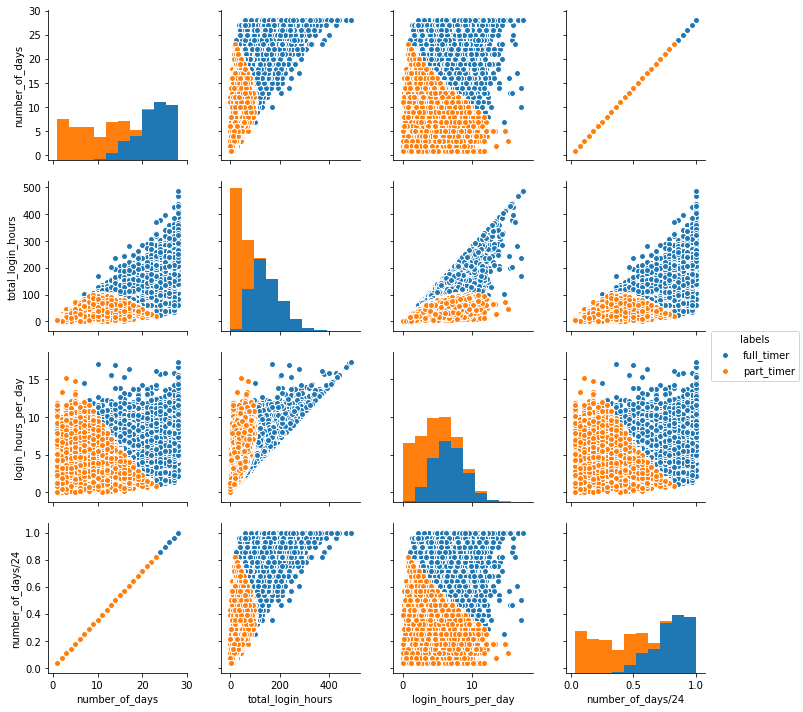

In [18]:
df1["labels"] = kmeans.labels_
df1["labels"] = df1["labels"].map({0:"part_timer",1:"full_timer"})
sns.pairplot(df1,hue="labels")
print("\n")
df1["labels"].value_counts()

In [19]:
temp_df = pd.read_csv("login_hours.csv")
temp_df = temp_df.sort_values(by=['car_number','active_date'],ascending=[True,True])
temp_df = temp_df[temp_df.category == "auto"]

In [20]:
temp_df = temp_df[temp_df.wk == 44]

In [22]:
t_number_of_days = temp_df["car_number"].value_counts()
t_number_of_days = t_number_of_days.sort_index()
t_total_login_hours = temp_df.groupby(["car_number"])["login_hours"].sum()
t_total_login_hours = t_total_login_hours.sort_index()

In [23]:
tdf1 = pd.concat([t_number_of_days,t_total_login_hours],axis=1)
tdf1.columns = ['number_of_days', 'total_login_hours']
tdf1["attendancep"] = tdf1["number_of_days"]/7
tdf1["login_hours_per_day"] = tdf1["total_login_hours"]/tdf1["number_of_days"]
tdf1.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,13379.000000,13379.000000,13379.000000,13379.000000
mean,4.984677,29.468553,0.712097,5.276411
std,1.952950,22.594832,0.278993,3.320202
min,1.000000,0.008889,0.142857,0.008889
25%,4.000000,10.349444,0.571429,2.649911
50%,6.000000,26.102500,0.857143,5.110764
75%,7.000000,44.817083,1.000000,7.646503
max,7.000000,142.100000,1.000000,22.958102


In [26]:
full_timerdf=df1[df1.labels == 'full_timer']
part_timerdf = df1[df1.labels == 'part_timer']

In [28]:
ftdf = tdf1.loc[full_timerdf.index.values]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [29]:
ptdf = tdf1.loc[part_timerdf.index.values]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [32]:
ftdf.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,7655.000000,7655.000000,7655.000000,7655.000000
mean,5.755062,39.025795,0.822152,6.544221
std,1.508262,21.549772,0.215466,3.015263
min,1.000000,0.013611,0.142857,0.013611
25%,5.000000,22.965000,0.714286,4.389648
50%,6.000000,37.575278,0.857143,6.477833
75%,7.000000,53.525694,1.000000,8.549369
max,7.000000,142.100000,1.000000,20.300000


In [33]:
7655/8255

0.9273167777104785

In [34]:
ptdf.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,5112.000000,5112.000000,5112.000000,5112.000000
mean,4.135563,17.606849,0.590795,3.691914
std,1.966012,17.009475,0.280859,2.899246
min,1.000000,0.008889,0.142857,0.008889
25%,2.000000,3.732222,0.285714,1.295931
50%,4.000000,12.817361,0.571429,3.163435
75%,6.000000,26.742153,0.857143,5.518155
max,7.000000,98.526111,1.000000,16.714861


In [35]:
5112/7192

0.710789766407119

In [38]:
temprory = ftdf[ftdf.attendancep>0.71]
temprory

,number_of_days,total_login_hours,attendancep,login_hours_per_day
car_number,,,,
AP09TA0141,5.0,16.434444,0.714286,3.286889
AP09TA0385,7.0,53.961389,1.000000,7.708770
AP09TA0488,5.0,12.675000,0.714286,2.535000
AP09TA0587,5.0,34.370000,0.714286,6.874000
AP09TA2562,5.0,12.881111,0.714286,2.576222
AP09TA2972,5.0,46.218889,0.714286,9.243778
AP09TA3235,7.0,14.326111,1.000000,2.046587
AP09TA3388,7.0,50.599444,1.000000,7.228492
AP09TA3556,6.0,37.882778,0.857143,6.313796


In [39]:
6240/7655

0.8151534944480732